<a href="https://colab.research.google.com/github/bgittel/Fiktion-und-Genre/blob/main/Scripts/MoL_Corpus_Exploration_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -U spacy
!python -m spacy download de_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 46.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
import spacy
import numpy as np

In [4]:
!pip install --upgrade nltk
!python -m nltk.downloader popular
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

# Download the NLTK data for the German language
nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
nltk.download('words')
#nltk.download('all')

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_d

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

# Reading data

In [7]:
import os

# Define the name of the folder you want to create
folder_name = 'txt_files'

os.mkdir("/content/txt_files/")

FileExistsError: [Errno 17] File exists: '/content/txt_files/'

In [9]:
#read kk-corpus
import zipfile
import shutil

#zip_file_path = '/content/drive/My Drive/Kulturkritik/70_Handbücher_docx_converted.zip'  # Update with your file path
#zip_file_path = '/content/drive/My Drive/Kulturkritik/Handbücher_Charge2_docx.zip'  # Update with your file path
zip_file_path = '/content/drive/My Drive/Kulturkritik/Korpus_gesamt/07-02-24.zip'  # Update with your file path

target_folder = '/content/txt_files/'  # The folder where you want to extract the files

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all files, ignoring subfolders
    for file_info in zip_ref.infolist():
        if not file_info.is_dir():
            file_name = os.path.basename(file_info.filename)
            zip_ref.extract(file_info, target_folder)

# Move all files to the target folder and ignore subfolders
for root, dirs, files in os.walk(target_folder):
    for file in files:
        shutil.move(os.path.join(root, file), target_folder)


In [10]:
# metadata kk
import pandas as pd
df = pd.read_excel("/content/drive/My Drive/Kulturkritik/Korpus_gesamt/Mastertable_102_Handbooks_plus_12_Monografies_Kolimo_checked_V4_plus_ebookinfo_plus_txts.xlsx")
df

,Unnamed: 0,author_surname,title,author_firstname,year,genre,fictional,kulturkri_expr,kulturkri_role,kulturkri_cause,...,heimatkunst,conservative_revolution,in_the_public_domain,filename_Kolimo,filename_xml,source,status,ebook_provider,filename_txt,filename_epub
0,0,Adorno,kulturkritik und gesellschaft,Theodor W.,1963,Abhandlung,False,0,1,0,...,0,0,False,NaN,NaN,other,NaN,NaN,Adorno_Kulturkritik-und-Gesellschaft_clean.txt,NaN
1,1,Adrian,der garten der erkenntnis,Leopold von,NaN,NaN,True,0,0,0,...,0,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Alberti,die alten und die jungen,Conrad,NaN,NaN,True,0,0,0,...,0,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Alberti,maschinen,Conrad,NaN,NaN,True,0,0,0,...,0,0,False,NaN,NaN,epub,bestellt,Thalia,Alberti_Maschinen---Das-Elend-der-Spin_9788026...,Alberti_Maschinen---Das-Elend-der-Spin_9788026...
4,4,Alberti,schröterco,Conrad,NaN,NaN,True,0,0,0,...,0,0,False,NaN,NaN,NaN,offen,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,570,Ziegler,das wesen der kultur,Leopold,1903,Abhandlung,False,0,1,0,...,0,0,False,NaN,NaN,other,NaN,NaN,Ziegler_Das-Wesen-der-Kultur_clean.txt,NaN
570,571,Zweig,adam lux,Stefan,NaN,NaN,True,0,0,0,...,0,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
571,572,Zweig,angst,Stefan,NaN,NaN,True,0,0,0,...,0,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
572,573,de Lagarde,deutsche schriften,Paul,1878,Abhandlung,False,0,1,0,...,0,0,False,NaN,NaN,other,NaN,NaN,de Lagarde_Deutsche_Schriften_Bd1_clean.txt,NaN


## Add Eltec

In [11]:
# read eltec
zip_file_path = '/content/drive/My Drive/Kulturkritik/Korpus_gesamt/Eltec_deu_txt.zip'  # Update with your file path

target_folder = '/content/txt_files'  # The folder where you want to extract the files

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(target_folder)

In [12]:
# metadata eltec
eltec_metadata = pd.read_csv("/content/drive/My Drive/Kulturkritik/Korpus_gesamt/eltec_metadata.csv", sep=",", encoding ="UTF-8")
eltec_metadata

eltec_metadata["author_surname"] = eltec_metadata["author-name"].str.split(", ").str.get(0)
eltec_metadata["author_firstname"] = eltec_metadata["author-name"].str.split(", ").str.get(1)
eltec_metadata["filename_txt"] = eltec_metadata["id"].astype(str) + ".txt"
eltec_metadata["title"] =  eltec_metadata["book-title"].str.split(".").str.get(0).str.lower()
eltec_metadata["fictional"] = True
eltec_metadata["ELTEC"] = True

# List of columns to set to 0
cols_to_set_to_zero = ["kulturkri_support",	"gesellschaftskri_support",	"zivilisationskri_support",	"dekadenz_support",	"sozialkri_support",	"zeitkri_support",	"modernekri_support"]
# Set all specified columns to 0
eltec_metadata.loc[:, cols_to_set_to_zero] = "-"

eltec_metadata

,id,author-name,book-title,subgenre,year,year-cat,canon-cat,gender-cat,length,length-cat,...,title,fictional,ELTEC,kulturkri_support,gesellschaftskri_support,zivilisationskri_support,dekadenz_support,sozialkri_support,zeitkri_support,modernekri_support
0,DEU001,"Willkomm, Ernst Adolf",Weisse Sclaven oder die Leiden des Volkes,foo,1845,T1,low,m,322371,long,...,weisse sclaven oder die leiden des volkes,True,True,-,-,-,-,-,-,-
1,DEU002,"Auerbach, Berthold",Der Lehnhold,foo,1854,T1,low,m,66067,medium,...,der lehnhold,True,True,-,-,-,-,-,-,-
2,DEU003,"Ruppius, Otto",Der Pedlar,foo,1857,T1,low,m,89800,medium,...,der pedlar,True,True,-,-,-,-,-,-,-
3,DEU004,"Otto, Louise",Nürnberg. Zweiter Band,foo,1858,T1,low,f,56702,medium,...,nürnberg,True,True,-,-,-,-,-,-,-
4,DEU005,"Kurz, Hermann",Der Sonnenwirt,foo,1854,T1,high,m,216063,long,...,der sonnenwirt,True,True,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,DEU096,"Meyrink, Gustav",Der Golem,foo,1913,T4,high,m,90790,medium,...,der golem,True,True,-,-,-,-,-,-,-
96,DEU097,"Keyserling, Eduard von",Wellen,foo,1911,T4,high,m,54745,medium,...,wellen,True,True,-,-,-,-,-,-,-
97,DEU098,"Reventlow, Franziska Gräfin zu",Herrn Dames Aufzeichnungen,foo,1913,T4,high,f,41778,short,...,herrn dames aufzeichnungen,True,True,-,-,-,-,-,-,-
98,DEU099,"Christ, Lena",Mathias Bichler,foo,1914,T4,high,f,81921,medium,...,mathias bichler,True,True,-,-,-,-,-,-,-


In [13]:
# join kk-corpus and eltec
df["ELTEC"] = False

# Assuming df is your original DataFrame and eltec_metadata is the second DataFrame
result_df = pd.concat([df, eltec_metadata], axis=0, ignore_index=True)

# Reindex the resulting DataFrame to ensure the same column order as the original df
result_df = result_df.reindex(columns=df.columns)

# Mark duplicates as True in the 'ELTEC' column and combine with existing True values
result_df['ELTEC'] = result_df['ELTEC'] | result_df.duplicated(subset=['title'], keep=False)

# Keep only the first row of each set of duplicates
result_df = result_df.drop_duplicates(subset=['title'], keep='first')

# Reset the index of the result DataFrame
result_df = result_df.reset_index(drop=True)

len(result_df)


659

In [14]:
result_df["ELTEC"].value_counts()

False    558
True     101
Name: ELTEC, dtype: int64

In [15]:
df = result_df

# Drop titles without plain text

In [16]:
# DF cleaning
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Replace single quotation mark in all columns ending with "_support"
df.loc[:, df.columns[df.columns.str.endswith('_support')]] = df.loc[:, df.columns[df.columns.str.endswith('_support')]].replace("'", "", regex=True)

# DROP NA's
df['filename_txt'] = df['filename_txt'].replace('NaN', np.nan)
df = df.dropna(subset=['filename_txt'])
df.reset_index(drop=True, inplace=True)
len(df)

<ipython-input-16-1072eb6d02a5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, df.columns[df.columns.str.endswith('_support')]] = df.loc[:, df.columns[df.columns.str.endswith('_support')]].replace("'", "", regex=True)
<ipython-input-16-1072eb6d02a5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['filename_txt'] = df['filename_txt'].replace('NaN', np.nan)


413

# Creating Categorical Variables

In [17]:
import pandas as pd
import ast
import numpy as np

# Function to check if a string contains any letters
def contains_letters(s):
    if isinstance(s, str):  # Check if the value is a string
        return any(c.isalpha() for c in s)
    return False  # Return False for non-string values, e.g., NaN or float

# Create corresponding _categorical columns for each _support column
for col_name in df.columns:
    if col_name.endswith("_support"):
        categorical_col_name = col_name.replace("_support", "Categorical")
        df[categorical_col_name] = df[col_name].apply(lambda x: contains_letters(x))

# Display the resulting DataFrame
len(df)

413

In [18]:
df.columns

Index(['author_surname', 'title', 'author_firstname', 'year', 'genre',
       'fictional', 'kulturkri_expr', 'kulturkri_role', 'kulturkri_cause',
       'modernekri_expr', 'modernekri_role', 'modernekri_cause',
       'gesellschaftskri_expr', 'gesellschaftskri_role',
       'gesellschaftskri_cause', 'zivilisationskri_expr',
       'zivilisationskri_role', 'zivilisationskri_cause', 'dekadenz_expr',
       'dekadenz_role', 'dekadenz_cause', 'sozialkri_expr', 'sozialkri_role',
       'sozialkri_cause', 'zeitkri_expr', 'zeitkri_role', 'zeitkri_cause',
       'gegenwartskri_expr', 'gegenwartskri_role', 'gegenwartskri_cause',
       'kulturkri_support', 'gesellschaftskri_support',
       'zivilisationskri_support', 'dekadenz_support', 'sozialkri_support',
       'zeitkri_support', 'modernekri_support', 'heimatkunst_support',
       'conservative_revolution_support', 'worldview_literature_support',
       'worldview_literature', 'heimatkunst', 'conservative_revolution',
       'in_the_public_

In [19]:
df["modernekriCategorical"].value_counts()

False    401
True      12
Name: modernekriCategorical, dtype: int64

# Filter Fiction (prepare for pydistinto)

In [20]:
df_filtered = df[df["fictional"] == True]
len(df_filtered)

df = df_filtered
len(df)

387

# Descriptive Statistics

In [21]:
import pandas as pd

# Assuming df is your DataFrame
# Filter columns ending with "_support"
support_cols = [col for col in df.columns if col.endswith("Categorical")]
support_cols.append("ELTEC")

# Count the number of True values for each support column
support_counts = df[support_cols].sum()

# Display the resulting support_counts DataFrame
support_counts

kulturkriCategorical                   64
gesellschaftskriCategorical            68
zivilisationskriCategorical            19
dekadenzCategorical                    46
sozialkriCategorical                   48
zeitkriCategorical                     90
modernekriCategorical                  12
heimatkunstCategorical                 24
conservative_revolutionCategorical      9
worldview_literatureCategorical        13
ELTEC                                 100
dtype: int64

In [22]:
# Overlap with ELTEC
support_counts_eltec = df.loc[df["ELTEC"] == True, support_cols].sum()
support_counts_eltec

kulturkriCategorical                    3
gesellschaftskriCategorical             6
zivilisationskriCategorical             0
dekadenzCategorical                     7
sozialkriCategorical                    0
zeitkriCategorical                      1
modernekriCategorical                   0
heimatkunstCategorical                  1
conservative_revolutionCategorical      0
worldview_literatureCategorical         1
ELTEC                                 100
dtype: int64

In [23]:
# describe numerical columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
kulturkri_expr,301.0,0.056478,0.245220,0.0,0.0,0.0,0.0,2.0
kulturkri_role,301.0,0.182724,0.420120,0.0,0.0,0.0,0.0,2.0
kulturkri_cause,301.0,0.006645,0.081378,0.0,0.0,0.0,0.0,1.0
modernekri_expr,301.0,0.016611,0.128023,0.0,0.0,0.0,0.0,1.0
modernekri_role,301.0,0.029900,0.189129,0.0,0.0,0.0,0.0,2.0
modernekri_cause,301.0,0.003322,0.057639,0.0,0.0,0.0,0.0,1.0
gesellschaftskri_expr,301.0,0.186047,0.488472,0.0,0.0,0.0,0.0,4.0
gesellschaftskri_role,301.0,0.093023,0.333643,0.0,0.0,0.0,0.0,2.0
gesellschaftskri_cause,301.0,0.006645,0.081378,0.0,0.0,0.0,0.0,1.0
zivilisationskri_expr,301.0,0.026578,0.161115,0.0,0.0,0.0,0.0,1.0


In [24]:
# group by category, count distinct subreddits and posts
df['index'] = df.index

cat_df = df.groupby('genre') \
           .agg({'fictional': pd.Series.nunique,
                 'index': pd.Series.count}) \
           .rename(columns={'fictional': 'num_fictional',
                            'index': 'num_titles'}) \
           .sort_values('num_titles', ascending=False)

# show top 5 records
cat_df.head(5)

,num_fictional,num_titles
genre,,
Roman,1,103
Erzählung,1,14
Novelle,1,10
Kurzprosa,1,1
Novellen,1,1


# Add texts as col

In [25]:
# Function to read text from a file
def read_text_from_file(filename):
    try:
        if pd.notna(filename):  # Check if the value is not NaN:
          filename = "/content/txt_files/" + filename
          with open(filename, 'r', encoding='utf-8') as file:
              return file.read()
    except FileNotFoundError:
        print(filename, " missing")
        return None  # Handle missing files as needed

# Apply the function to create the 'text' column
df['text'] = df['filename_txt'].apply(read_text_from_file)

# Display the resulting DataFrame
#df


In [26]:
df['text_length'] = df['text'].str.len()

def word_count(review):
    review_list = review.split()
    return len(review_list)
df['word_count'] = df['text'].apply(lambda x: word_count(x) if pd.notna(x) else None)

df['mean_word_length'] = df['text'].map(lambda text: np.mean([len(word) for word in text.split()]))

df['mean_sent_length'] = df['text'].map(lambda text: np.mean([len(sent) for sent in nltk.sent_tokenize(text, language="german")]))
df.head(10)

,author_surname,title,author_firstname,year,genre,fictional,kulturkri_expr,kulturkri_role,kulturkri_cause,modernekri_expr,...,modernekriCategorical,heimatkunstCategorical,conservative_revolutionCategorical,worldview_literatureCategorical,index,text,text_length,word_count,mean_word_length,mean_sent_length
1,Alberti,maschinen,Conrad,NaN,NaN,True,0.0,0.0,0.0,0.0,...,False,False,False,False,1,Konrad Alberti\nMaschinen - Das Elend der Spin...,523728,81632,5.352484,129.925721
3,Anzengruber,der sternsteinhof,Ludwig:,1885,Roman,True,0.0,0.0,0.0,0.0,...,False,True,False,False,3,Der Sternsteinhof\nLudwig Anzengruber\n\n\nEin...,515516,84005,5.112184,161.189172
4,Arnim,dies buch gehört dem könig,Bettina von,NaN,NaN,True,0.0,0.0,0.0,0.0,...,False,False,False,False,4,Dies Buch gehört dem König\nBettina von Arnim\...,702315,112170,5.245654,118.554609
5,Arnim,gespräche mit dämonen,Bettina von,NaN,NaN,True,0.0,0.0,0.0,0.0,...,False,False,False,False,5,Gespräche mit Dämonen\nBettina von Arnim\n\n\n...,423062,67184,5.274396,203.266538
6,Auerbach,schwarzwälder dorfgeschichten,Berthold,1884,Erzählung,True,0.0,0.0,0.0,0.0,...,False,True,False,False,6,Schwarzwälder Dorfgeschichten\nBerthold Auerba...,5150049,852818,5.028101,144.244090
7,Bachmann,die fähre,Ingeborg,NaN,NaN,True,0.0,0.0,0.0,0.0,...,False,False,False,False,7,Die Fähre\nIngeborg Bachmann\n\n\nIm hohen Som...,8167,1364,4.984604,64.320000
8,Bechstein,undank ist der welt lohn,Ludwig,NaN,NaN,True,0.0,0.0,0.0,0.0,...,False,False,False,False,8,Undank ist der Welt Lohn\nLudwig Bechstein\n\n...,15851,2568,5.156931,292.537037
9,Bernhard,amras,Thomas,NaN,NaN,True,0.0,0.0,0.0,0.0,...,False,False,False,False,9,Thomas Bernhard\nAmras\n \n \n \n ...,123369,18431,5.603874,621.167513
10,Bernhard,frost,Thomas,1963,Roman,True,0.0,1.0,0.0,0.0,...,True,False,False,False,10,Thomas Bernhard\nFrost\n\n \n\n \n\n ...,650000,101696,5.370664,97.618845
11,Bernhard,holzfällen,Thomas,NaN,NaN,True,0.0,0.0,0.0,0.0,...,False,False,False,False,11,Thomas Bernhard\nHolzfällen\n \n\n \n\n ...,394407,59452,5.620114,261.149701


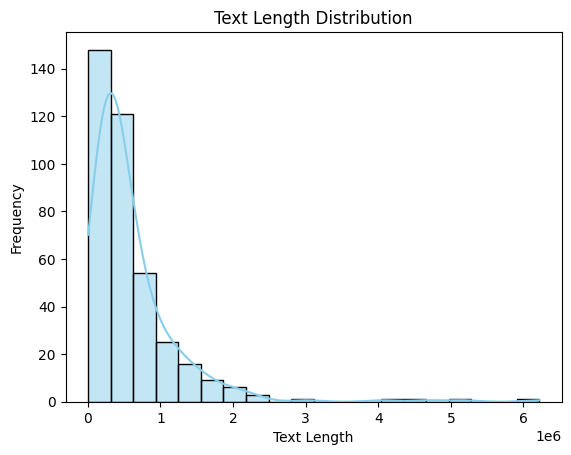

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df['text_length'] is your DataFrame column
sns.histplot(df['text_length'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


# Clean texts

In [32]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
import re

stemmer = SnowballStemmer("german")
stop_words = set(stopwords.words("german"))

def clean_text(text, for_embedding=False):
    """
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    if for_embedding:
        # Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    # Sichel-s
    text = text.replace("ſ", "s")

    # Replace Umlaute
    #text = text.replace('ä', 'ae').replace('ö', 'oe').replace('ü', 'ue')
    #text = text.replace('Ä', 'Ae').replace('Ö', 'Oe').replace('Ü', 'Ue')

    # ß
    text = text.replace('ß', 'ss')

    #Inhaltsverzeichnis
    text = text.replace("Inhaltsverzeichnis", "")

    # Gutenberg Anzeige
    gb = """Anzeige. Gutenberg Edition 16. Alle Werke
aus dem Projekt Gutenberg-DE. Mit zusätzlichen E-Books. Eine
einmalige Bibliothek. +++ Information und Bestellung in unserem Shop
+++"""
    text = text.replace(gb, '')

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            stemmer.stem(word) for word in words_tokens_lower if word not in stop_words
        ]

    text_clean = " ".join(words_filtered)
    return text_clean

In [33]:
df['text_clean'] = df['text'].apply(lambda x: clean_text(x, for_embedding=True))

In [34]:
df['text_clean'][1][:300]

'Konrad Alberti Maschinen Das Elend der Spinnereiarbeiter Es muss gelitten sein denn gleichwie der Flachs , daraus man Leinwand macht , muss viel leiden , ehe er zum rechten Brauch kommt und das Ende erreicht , darum er gesäet wird also müssen die Christen viel leiden , müssen gesäet , geraffelt , ge'

## write cleaned text to txt-files

In [35]:
import os
import zipfile
import shutil
from datetime import datetime


df["filename_cleantext"] = ""

# Define the output directories
output_directory = '/content/drive/My Drive/Kulturkritik/Korpus_gesamt/'
temp_directory = '/content/temp/'

# Delete all files in the temp directory
shutil.rmtree(temp_directory, ignore_errors=True)

# Recreate an empty temp directory
os.makedirs(temp_directory, exist_ok=True)

# Get the current date
current_date = datetime.today().strftime('%Y-%m-%d')

# Define your output filename with the current date
zip_file_name = f'cleaned_corpus_{current_date}.zip'

# Create temp directory if it doesn't exist
os.makedirs(temp_directory, exist_ok=True)

# Iterate over rows and write cleaned text to new text files in the temp directory
for index, row in df.iterrows():
    filename_txt = row['filename_txt']
    text_clean = row['text_clean']
    author = row['author_surname']
    title = row['title']

    # Create the modified filename
    modified_filename = author + "__" + title.replace(' ', '_') + "_clean" + ".txt"

    # add col to df
    df.loc[index, "filename_cleantext"] = modified_filename


    # Full path for the output text file in the temp directory
    temp_filepath = os.path.join(temp_directory, modified_filename)

    # Write cleaned text to the new text file
    with open(temp_filepath, 'w', encoding='utf-8') as file:
        file.write(text_clean)

# Create a ZipFile containing all files in the temp directory
with zipfile.ZipFile(os.path.join(output_directory, zip_file_name), 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(temp_directory):
        for file in files:
            zipf.write(os.path.join(root, file), arcname=os.path.relpath(os.path.join(root, file), temp_directory))

## Create Derived Textformats (optional)


In [36]:
os.mkdir("/content/ATF_files/")

In [37]:
"""
Created on Thu Feb  8 13:27:48 2024

@author: kelidu
"""

import math
import random
import os

#Hier den Pfad des Ordner eingeben, wo die originalen Texte stehen.
corpus_path = r'/content/txt_files/'
filenames = [os.path.join(corpus_path, fn) for fn in df["filename_txt"] if not pd.isna(fn)]

'''
Die Funktion nimmt eine .txt-Datei als Input und zerlegt den Text in 1000-Token-Segmente.
Die Reihenfolge der Wörter in jedem Segment wird dann randomisiert.
'''
def create_dtf (file, segment_length=1000):
    text = open(file, 'r', encoding='utf-8').read()
    word_list = text.split(' ')
    all_segments = []
    segment_count = 0
    while segment_count < math.ceil(len(word_list) / segment_length):
        segment = word_list[segment_count*segment_length : segment_count*segment_length+segment_length]
        random.shuffle(segment)
        all_segments.append(' '.join(segment))
        segment_count +=1
    output_string =' '.join(all_segments)
    with open(os.path.basename(file), 'w', encoding='utf-8') as fout:
        fout.write(output_string)
    #return output_string


#Hier den Pfad eingeben, wo die Texte in ATF gespeichert werden sollen.
output_dir = r'/content/ATF_files/'
os.chdir(output_dir)

for file in filenames:
	create_dtf(file)

shutil.make_archive("/content/drive/My Drive/Kulturkritik/Korpus_gesamt/ATF_files", 'zip', output_dir)

'/content/drive/My Drive/Kulturkritik/Korpus_gesamt/ATF_files.zip.zip'

# Export df


In [38]:
import pandas as pd
from datetime import datetime

# Get the current date in German format
date_today = datetime.now().strftime("%d.%m.%Y")

# Define the output directory
output_directory = '/content/drive/My Drive/Kulturkritik/Results/'

# Save DataFrame to CSV
csv_file_path = f"{output_directory}corpus_exploration_{date_today}.csv"
df.to_csv(csv_file_path, encoding='utf-8', index=False)
print(f"CSV saved: {csv_file_path}")

# Save DataFrame to Excel (XLSX)
xlsx_file_path = f"{output_directory}corpus_exploration_{date_today}.xlsx"
df.to_excel(xlsx_file_path, index=False)
print(f"Excel (XLSX) saved: {xlsx_file_path}")

# Save DataFrame to pickle
pickle_file_path = f"{output_directory}corpus_exploration_{date_today}.pickle"
df.to_pickle(pickle_file_path)
print(f"Pickle saved: {pickle_file_path}")


CSV saved: /content/drive/My Drive/Kulturkritik/Results/corpus_exploration_12.02.2024.csv
Excel (XLSX) saved: /content/drive/My Drive/Kulturkritik/Results/corpus_exploration_12.02.2024.xlsx
Pickle saved: /content/drive/My Drive/Kulturkritik/Results/corpus_exploration_12.02.2024.pickle


# Create metadata for pydistinto

In [50]:
# create metadata for pydistinto
metadata_df = df
#metadata_df["idno"] = metadata_df["filename_cleantext"].str.split(".").str.get(0)
metadata_df["idno"] = metadata_df["filename_cleantext"].str.split(".").str[0]

# Define the columns to keep
columns_to_keep = ['author_surname', 'title', 'author_firstname', 'year', 'genre', 'fictional', 'idno', 'ELTEC']

# Select columns that end with "_categorical"
columns_to_keep += [col for col in df.columns if col.endswith("Categorical")]
columns_to_keep += [col for col in df.columns if col.endswith("_support")]
columns_to_keep += [col for col in df.columns if col.endswith("_expr")]
columns_to_keep += [col for col in df.columns if col.endswith("_role")]
columns_to_keep += [col for col in df.columns if col.endswith("_cause")]

# Create a new DataFrame with only the desired columns
metadata_df = metadata_df[columns_to_keep].copy()

# Convert truth value columns to string columns
#for col in metadata_df.columns:
#    if metadata_df[col].dtype == bool:
#        metadata_df[col] = metadata_df[col].astype(str)

# replace boolean by strings
#metadata_df.replace({"True": "yes", "False": "no"}, inplace=True)

# Get the current date
current_date = datetime.today().strftime('%Y-%m-%d')

# Define your output filename with the current date
output_filename = f'MoL_metadata_{current_date}.csv'
output_directory = '/content/drive/My Drive/Kulturkritik/Korpus_gesamt/'
output_filename2 = f'MoL_metadata_{current_date}.xlsx'


# Full output path
output_path = os.path.join(output_directory, output_filename)
output_path2 = os.path.join(output_directory, output_filename2)


# Save the DataFrame as a CSV file with tab separator
metadata_df.to_csv(output_path, sep='\t', encoding='utf-8', index=False)
metadata_df.to_excel(output_path2,  encoding='utf-8', index=False)
metadata_df

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


,author_surname,title,author_firstname,year,genre,fictional,idno,ELTEC,kulturkriCategorical,gesellschaftskriCategorical,...,zeitkri_role,gegenwartskri_role,kulturkri_cause,modernekri_cause,gesellschaftskri_cause,zivilisationskri_cause,dekadenz_cause,sozialkri_cause,zeitkri_cause,gegenwartskri_cause
1,Alberti,maschinen,Conrad,NaN,NaN,True,Alberti__maschinen_clean,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Anzengruber,der sternsteinhof,Ludwig:,1885,Roman,True,Anzengruber__der_sternsteinhof_clean,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Arnim,dies buch gehört dem könig,Bettina von,NaN,NaN,True,Arnim__dies_buch_gehört_dem_könig_clean,False,False,False,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Arnim,gespräche mit dämonen,Bettina von,NaN,NaN,True,Arnim__gespräche_mit_dämonen_clean,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Auerbach,schwarzwälder dorfgeschichten,Berthold,1884,Erzählung,True,Auerbach__schwarzwälder_dorfgeschichten_clean,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,Meyrink,der golem,Gustav,1913,NaN,True,Meyrink__der_golem_clean,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409,Keyserling,wellen,Eduard von,1911,NaN,True,Keyserling__wellen_clean,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
410,Reventlow,herrn dames aufzeichnungen,Franziska Gräfin zu,1913,NaN,True,Reventlow__herrn_dames_aufzeichnungen_clean,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411,Christ,mathias bichler,Lena,1914,NaN,True,Christ__mathias_bichler_clean,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# prepare for one category vs ELTEC

# Eltec without Overlap
metadata_df['ELTEC_without_overlap'] = metadata_df['ELTEC'] & ~metadata_df.filter(regex='Categorical$', axis=1).any(axis=1)

# Identify columns ending with "_kritik"
kritik_columns = [col for col in metadata_df.columns if col.endswith("Categorical")]

# Create a Zip file to store the CSV files
zip_filename = "/content/drive/My Drive/Kulturkritik/Results/metadata_for_pydistinto_onecat_vs_eltec_XOR.zip"
with zipfile.ZipFile(zip_filename, 'w') as zip_file:
    # Iterate over each "_kritik" column and save the filtered DataFrame
    for col in kritik_columns:
        # Create a filtered DataFrame based on the conditions

        # inclusive OR
        #filtered_df = metadata_df[(metadata_df[col] == True) | (metadata_df['ELTEC'] == True)]

        # exclusive OR
        filtered_df = metadata_df[(metadata_df[col] == True) ^ (metadata_df['ELTEC_without_overlap'] == True)]

        print(len(filtered_df))
        filtered_df.replace({True: "yes", False: "no"}, inplace=True)

        col_name = col.replace("Categorical", "")
        # Save the filtered DataFrame to a CSV file
        csv_filename = f"metadata_{col_name}.csv"
        filtered_df.to_csv(csv_filename, sep='\t', encoding='utf-8', index=False)

        # Add the CSV file to the Zip file
        zip_file.write(csv_filename)

        print(f"Saved {csv_filename} to {zip_filename}")

# Print a message indicating the process is complete
print(f"All CSV files zipped into {zip_filename}")



150
Saved metadata_kulturkri.csv to /content/drive/My Drive/Kulturkritik/Results/metadata_for_pydistinto_onecat_vs_eltec_XOR.zip
154
Saved metadata_gesellschaftskri.csv to /content/drive/My Drive/Kulturkritik/Results/metadata_for_pydistinto_onecat_vs_eltec_XOR.zip
105
Saved metadata_zivilisationskri.csv to /content/drive/My Drive/Kulturkritik/Results/metadata_for_pydistinto_onecat_vs_eltec_XOR.zip
132
Saved metadata_dekadenz.csv to /content/drive/My Drive/Kulturkritik/Results/metadata_for_pydistinto_onecat_vs_eltec_XOR.zip
134
Saved metadata_sozialkri.csv to /content/drive/My Drive/Kulturkritik/Results/metadata_for_pydistinto_onecat_vs_eltec_XOR.zip
176
Saved metadata_zeitkri.csv to /content/drive/My Drive/Kulturkritik/Results/metadata_for_pydistinto_onecat_vs_eltec_XOR.zip
98
Saved metadata_modernekri.csv to /content/drive/My Drive/Kulturkritik/Results/metadata_for_pydistinto_onecat_vs_eltec_XOR.zip
110
Saved metadata_heimatkunst.csv to /content/drive/My Drive/Kulturkritik/Results/met

<ipython-input-46-5ed4add620bf>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.replace({True: "yes", False: "no"}, inplace=True)


In [44]:
import pandas as pd

# Assuming df is your DataFrame
# Filter columns ending with "_support"
support_cols = [col for col in metadata_df.columns if col.endswith("Categorical")]
support_cols.append("ELTEC")
support_cols.append("ELTEC_without_overlap")

# Count the number of True values for each support column
support_counts = metadata_df[support_cols].sum()

# Display the resulting support_counts DataFrame
support_counts

kulturkriCategorical                   64
gesellschaftskriCategorical            68
zivilisationskriCategorical            19
dekadenzCategorical                    46
sozialkriCategorical                   48
zeitkriCategorical                     90
modernekriCategorical                  12
heimatkunstCategorical                 24
conservative_revolutionCategorical      9
worldview_literatureCategorical        13
ELTEC                                 100
ELTEC_without_overlap                  86
dtype: int64

# Lemmatization and most common words

In [ ]:
## Lemmatizer ...
# Load spaCy with the German language model (tokenizer and lemmatizer only)
nlp = spacy.load("de_core_news_sm", exclude=['tagger', 'parser', 'ner'])
nlp.max_length = 6000000

stop_words_german = set(stopwords.words("german"))

# Function to lemmatize a text using spaCy and remove stopwords
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc if token.lemma_.lower() not in stop_words_german and not "--"]
    return lemmatized_tokens

# Apply lemmatization to the 'text' column and create a new column 'lemmatized_text'
df['lemmatized_text'] = df['text_clean'].apply(lemmatize_text)

# Display the resulting DataFrame
df.head(5)

,author_surname,title,author_firstname,year,genre,fictional,kulturkri_expr,kulturkri_role,kulturkri_cause,gesellschaftskri_expr,...,index,text,text_length,word_count,mean_word_length,mean_sent_length,text_clean,filename_cleantext,idno,lemmatized_text
0,Alberti,maschinen,Conrad,NaN,NaN,True,0.0,0.0,0.0,0.0,...,0,Konrad Alberti\nMaschinen - Das Elend der Spin...,523728,81632,5.352484,129.925721,Konrad Alberti Maschinen Das Elend der Spinner...,Alberti__maschinen_clean.txt,Alberti__maschinen_clean,[]
1,Anzengruber,der sternsteinhof,Ludwig:,1885,Roman,True,0.0,0.0,0.0,0.0,...,1,Der Sternsteinhof\nLudwig Anzengruber\n\n\nEin...,515516,84005,5.112184,161.189172,Der Sternsteinhof Ludwig Anzengruber Ein Gussr...,Anzengruber__der_sternsteinhof_clean.txt,Anzengruber__der_sternsteinhof_clean,[]
2,Arnim,dies buch gehört dem könig,Bettina von,NaN,NaN,True,0.0,0.0,0.0,0.0,...,2,Dies Buch gehört dem König\nBettina von Arnim\...,702315,112170,5.245654,118.554609,Dies Buch gehört dem König Bettina von Arnim E...,Arnim__dies_buch_gehört_dem_könig_clean.txt,Arnim__dies_buch_gehört_dem_könig_clean,[]
3,Arnim,gespräche mit dämonen,Bettina von,NaN,NaN,True,0.0,0.0,0.0,0.0,...,3,Gespräche mit Dämonen\nBettina von Arnim\n\n\n...,423062,67184,5.274396,203.266538,Gespräche mit Dämonen Bettina von Arnim Dem Ge...,Arnim__gespräche_mit_dämonen_clean.txt,Arnim__gespräche_mit_dämonen_clean,[]
4,Auerbach,schwarzwälder dorfgeschichten,Berthold,1884,Erzählung,True,0.0,0.0,0.0,0.0,...,4,Schwarzwälder Dorfgeschichten\nBerthold Auerba...,5150049,852818,5.028101,144.244090,Schwarzwälder Dorfgeschichten Berthold Auerbac...,Auerbach__schwarzwälder_dorfgeschichten_clean.txt,Auerbach__schwarzwälder_dorfgeschichten_clean,[]


In [ ]:
from collections import Counter
from tqdm import trange

df['most_common_words'] = df['lemmatized_text'].apply(lambda x: Counter(word.lower() for word in x).most_common(10))

corpus = []
for i in trange(df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    #corpus += df['lemmatized_text'][i]
    corpus += [word.lower() for word in df['lemmatized_text'][i]]
len(corpus)

mostCommon = Counter(corpus).most_common(10)
mostCommon

  5%|█████▎                                                                                                       | 18/369 [00:00<00:00, 29115.88it/s]


KeyError: 18

# Collocations

In [ ]:
import pandas as pd
from nltk import collocations, FreqDist, BigramAssocMeasures
from nltk.tokenize import word_tokenize

# Function to extract collocations for a specific word in a given text
def extract_collocations(text, target_word, window_size=10, num_collocations=10):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Create a BigramCollocationFinder
    bigram_measures = BigramAssocMeasures()
    finder = collocations.BigramCollocationFinder.from_words(tokens, window_size=window_size)

    # Filter collocations containing the target word
    finder.apply_word_filter(lambda w: w.lower() != target_word.lower())

    # Get the top collocations
    collocations_result = finder.nbest(bigram_measures.likelihood_ratio, num_collocations)

    return collocations_result

# Extract collocations for the word "FR" in the first text
first_text_collocations = extract_collocations(df['text'].iloc[0], 'beinahe')

# Display the result
print("Collocations for 'beinahe' in the first text:", first_text_collocations)


# Readability

In [ ]:
!pip install textstat
import textstat

def calculate_flesch_reading_ease(text):
    try:
        flesch_reading_ease = textstat.flesch_reading_ease(text)
        return flesch_reading_ease
    except Exception as e:
        print(f"Error calculating Flesch Reading Ease Score: {str(e)}")
        return None

df['flesch_reading_ease'] = df['text_clean'].apply(calculate_flesch_reading_ease)


In [ ]:
df.sort_values(by='flesch_reading_ease', ascending=True).head(15)

# Export df


In [ ]:
import pandas as pd
from datetime import datetime

# Get the current date in German format
date_today = datetime.now().strftime("%d.%m.%Y")

# Define the output directory
output_directory = '/content/drive/My Drive/Kulturkritik/Results/'

# Save DataFrame to CSV
csv_file_path = f"{output_directory}corpus_exploration_{date_today}.csv"
df.to_csv(csv_file_path, encoding='utf-8', index=False)
print(f"CSV saved: {csv_file_path}")

# Save DataFrame to Excel (XLSX)
xlsx_file_path = f"{output_directory}corpus_exploration_{date_today}.xlsx"
df.to_excel(xlsx_file_path, index=False)
print(f"Excel (XLSX) saved: {xlsx_file_path}")

# Save DataFrame to pickle
pickle_file_path = f"{output_directory}corpus_exploration_{date_today}.pickle"
df.to_pickle(pickle_file_path)
print(f"Pickle saved: {pickle_file_path}")


In [ ]:
### READ ###
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/Kulturkritik/Results/corpus_exploration_23.01.2024.csv", sep=",", encoding ="UTF-8")

In [ ]:
len(df)

369

# Scattertext

In [ ]:
!pip3 install -U scattertext
#!pip install jieba empath astropy flashtext gensim umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9296 sha256=f83cfd4e578f8c446e6346fd8e810284c179750ed51f4f76fd55dc37a536e574
  Stored in directory: /root/.cache/pip/wheels/bc/be/39/c37ad168eb2ff644c9685f52554440372129450f0b8ed203dd
Successfully built flashtext


In [ ]:
import scattertext as st
from pprint import pprint
!python -m spacy download de_core_news_sm
import spacy
nlp = spacy.load("de_core_news_sm", disable=['ner','parser'])
nlp.add_pipe('sentencizer')
nlp.max_length = 60000000
from scipy.stats import rankdata
from IPython.display import IFrame
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
import matplotlib.pyplot as plt
%matplotlib inline

2024-01-24 10:54:43.912384: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-24 10:54:43.912434: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-24 10:54:43.914120: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-24 10:54:45.191626: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 49.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')


In [ ]:
import os
os.mkdir('output')

In [ ]:
# create subcorpus

df_kultur = df[(df["kulturkriCategorical"] == True) | (df["ELTEC"] == True)]

# Assuming df_kultur is your DataFrame
df_kultur["category"] = df_kultur.apply(lambda row: "Kulturkritik" if row["kulturkriCategorical"] and not row["ELTEC"]
                                               else "ELTEC" if not row["kulturkriCategorical"] and row["ELTEC"]
                                               else "Kulturkritik", axis=1)
df_kultur.reset_index(drop=True, inplace=True)
df_kultur = df_kultur.rename_axis("new_index_name")
len(df_kultur)

<ipython-input-7-0108ba4dac8d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kultur["category"] = df_kultur.apply(lambda row: "Kulturkritik" if row["kulturkriCategorical"] and not row["ELTEC"]


158

In [ ]:
df_kultur["category"].value_counts()

ELTEC           97
Kulturkritik    61
Name: category, dtype: int64

## Remove Stopwords

In [ ]:
from nltk.corpus import stopwords
stop_words_german = set(stopwords.words("german"))

def remove_stopwords(text):
    words = [word for word in text.split() if word.lower() not in stop_words_german]
    return ' '.join(words)

# Apply the custom function to the "text_clean" column
df_kultur["text_clean_no_stopwords"] = df_kultur["text_clean"].apply(remove_stopwords)

In [ ]:
corpus = st.CorpusFromPandas(df_kultur, category_col='category', text_col='text_clean_no_stopwords', nlp=nlp).build()

In [ ]:
import pickle

# Save variables to a file
scattertext_corpus = {"corpus": corpus, "df": df}
with open("/content/drive/My Drive/Kulturkritik/Results/fk_scattertext_corpus.pkl", "wb") as file:
    pickle.dump(scattertext_corpus, file)


In [ ]:
### LOAD
import pickle

# Load the dictionary from the pickle file
with open('/content/drive/My Drive/Kulturkritik/Results/fk_scattertext_corpus.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

# Unpack the dictionary items into separate variables
for key, value in loaded_data.items():
    globals()[key] = value

In [ ]:
# Here are the terms that differentiate the corpus from a general English corpus.
print(list(corpus.get_scaled_f_scores_vs_background().index[:10]))

['sagte', 'schon', 'immer', 'ganz', 'mehr', 'sah', 'wurde', 'augen', 'herr', 'sei']


In [ ]:
#Here are the terms that are most associated with Democrats:
term_freq_df = corpus.get_term_freq_df()
term_freq_df['Kulturkritik Score'] = corpus.get_scaled_f_scores('Kulturkritik')
pprint(list(term_freq_df.sort_values(by='Kulturkritik Score', ascending=False).index[:10]))

['pfäffling',
 'sina',
 'bambi',
 'carl joseph',
 'bezirkshauptmann',
 'buddenbrook',
 'antonie',
 'gühler',
 'beijerke',
 'trotta']


In [ ]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

html = st.produce_scattertext_explorer(
          corpus,
          category='Kulturkritik',
          #category_name='Kulturkritik',
          #not_category_name='ELTEC',
          not_categories=['Kulturkritik'],
          sort_by_dist=False,
          #minimum_term_frequency=10,
          metadata=df_kultur['title'],
          term_scorer=st.RankDifference(),
          transform=st.Scalers.percentile_dense
          )
#open("Convention-Visualization2.html", 'wb').write(html.encode('utf-8'))
HTML(html)

# Playground

In [ ]:
print(df["text"][4][:500])

In [ ]:
print(clean_text(df["text"][4][:500], for_embedding=True))

In [ ]:
lemmatize_text(clean_text(df["text"][4][:500], for_embedding=True))

In [ ]:
# Load spaCy with the German language model (tokenizer, lemmatizer, and POS tagger)
nlp = spacy.load("de_core_news_sm", exclude=['parser', 'ner'])
nlp.max_length = 6000000

# Function to lemmatize and perform POS tagging on a text using spaCy
def lemmatize_and_pos_tag(text):
    doc = nlp(text)
    lemmatized_tokens = [(token.lemma_, token.pos_) for token in doc]
    return lemmatized_tokens

In [ ]:
print(lemmatize_and_pos_tag(clean_text(df["text"][1][:500], for_embedding=True)))

In [ ]:
df

In [ ]:
stop_words_german

In [ ]:
import re

def normalize_spelling(text):
    # Replace long s (ſ) with standard s (s)
    text = re.sub(r'ſ', 's', text)
    # Add more rules as needed

    return text

# Example usage
historical_text = "Daß iſt ein Beispielſatz mit ſogenannten langen ſ, da kann man nicht viel thun."
normalized_text = normalize_spelling(historical_text)
print(normalized_text)


Daß ist ein Beispielsatz mit sogenannten langen s, da kann man nicht viel thun.


In [ ]:
metadata_df["idno"].str.count('.')

0      28
1      40
2      43
3      38
4      49
       ..
389    28
390    28
391    47
392    33
393    33
Name: idno, Length: 383, dtype: int64

In [ ]:
df["title"]

0                                maschinen
1                        der sternsteinhof
2               dies buch gehört dem könig
3                    gespräche mit dämonen
4            schwarzwälder dorfgeschichten
                      ...                 
278                               kein ort
279                                  medea
280                               störfall
281    katenkamp und die große schweinerei
282                         corpus delicti
Name: title, Length: 283, dtype: object

In [ ]:
df["zeitkriCategorical"]

0       True
1      False
2       True
3      False
4      False
       ...  
278    False
279    False
280    False
281    False
282    False
Name: zeitkriCategorical, Length: 283, dtype: object